In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import itertools
warnings.filterwarnings(action='ignore')
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
import statsmodels.api as sm

In [2]:
sales_data = pd.read_csv('C:/Users/SHIVANI SINGH/OneDrive/Documents/train.csv')

In [3]:
sales_data.head()

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0  Order Date    Customer Name    Segment        Country  \
0           0  08/11/2017      Claire Gute   Consumer  United States   
1           1  08/11/2017      Claire Gute   Consumer  United States   
2           2  12/06/2017  Darrin Van Huff  Corporate  United States   
3           3  11/10/2016   Sean O'Donnell   Consumer  United States   
4           4  11/10/2016   Sean O'Donnell   Consumer  United States   

              City       State Region       Product ID         Category  \
0        Henderson    Kentucky  South  FUR-BO-10001798        Furniture   
1        Henderson    Kentucky  South  FUR-CH-10000454        Furniture   
2      Los Angeles  California   West  OFF-LA-10000240  Office Supplies   
3  Fort Lauderdale     Florida  South  FUR-TA-10000577        Furniture   
4  Fort Lauderdale     Florida  South  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name     Sales  
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4      Storage                     Eldon Fold 'N Roll Cart System   22.3680

In [4]:
sales_data.tail()

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
9784          9784          9784          9784          9784          9784   
9785          9785          9785          9785          9785          9785   
9786          9786          9786          9786          9786          9786   
9787          9787          9787          9787          9787          9787   
9788          9788          9788          9788          9788          9788   

      Unnamed: 0  Order Date     Customer Name    Segment        Country  \
9784        9795  21/05/2017     Sally Hughsby  Corporate  United States   
9785        9796  12/01/2016  Cindy Schnelling  Corporate  United States   
9786        9797  12/01/2016  Cindy Schnelling  Corporate  United States   
9787        9798  12/01/2016  Cindy Schnelling  Corporate  United States   
9788        9799  12/01/2016  Cindy Schnelling  Corporate  United States   

         City     State   Region       Product ID         Category  \
9784  Chicago  Illinois  Central  OFF-BI-10003429  Office Supplies   
9785   Toledo      Ohio     East  OFF-AR-10001374  Office Supplies   
9786   Toledo      Ohio     East  TEC-PH-10004977       Technology   
9787   Toledo      Ohio     East  TEC-PH-10000912       Technology   
9788   Toledo      Ohio     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name    Sales  
9784      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.798  
9785          Art           BIC Brite Liner Highlighters, Chisel Tip   10.368  
9786       Phones                                        GE 30524EE4  235.188  
9787       Phones           Anker 24W Portable Micro USB Car Charger   26.376  
9788  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.384

In [5]:
sales_data.shape

(9789, 18)

In [6]:
sales_data.describe()

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
count   9789.000000   9789.000000   9789.000000   9789.000000   9789.000000   
mean    4894.000000   4894.000000   4894.000000   4894.000000   4894.000000   
std     2825.985226   2825.985226   2825.985226   2825.985226   2825.985226   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     2447.000000   2447.000000   2447.000000   2447.000000   2447.000000   
50%     4894.000000   4894.000000   4894.000000   4894.000000   4894.000000   
75%     7341.000000   7341.000000   7341.000000   7341.000000   7341.000000   
max     9788.000000   9788.000000   9788.000000   9788.000000   9788.000000   

        Unnamed: 0         Sales  
count  9789.000000   9789.000000  
mean   4895.705588    230.116193  
std    2827.486899    625.302079  
min       0.000000      0.444000  
25%    2448.000000     17.248000  
50%    4895.000000     54.384000  
75%    7343.000000    210.392000  
max    9799.000000  22638.480000

In [7]:
sales_data.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Order Date', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [8]:
sales_data.isnull().sum()

Unnamed: 0.5     0
Unnamed: 0.4     0
Unnamed: 0.3     0
Unnamed: 0.2     0
Unnamed: 0.1     0
Unnamed: 0       0
Order Date       0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [9]:
sales_data=sales_data.dropna(axis=0)

In [10]:
sales_data.isnull().sum()

Unnamed: 0.5     0
Unnamed: 0.4     0
Unnamed: 0.3     0
Unnamed: 0.2     0
Unnamed: 0.1     0
Unnamed: 0       0
Order Date       0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
sales_data.shape

(9789, 18)

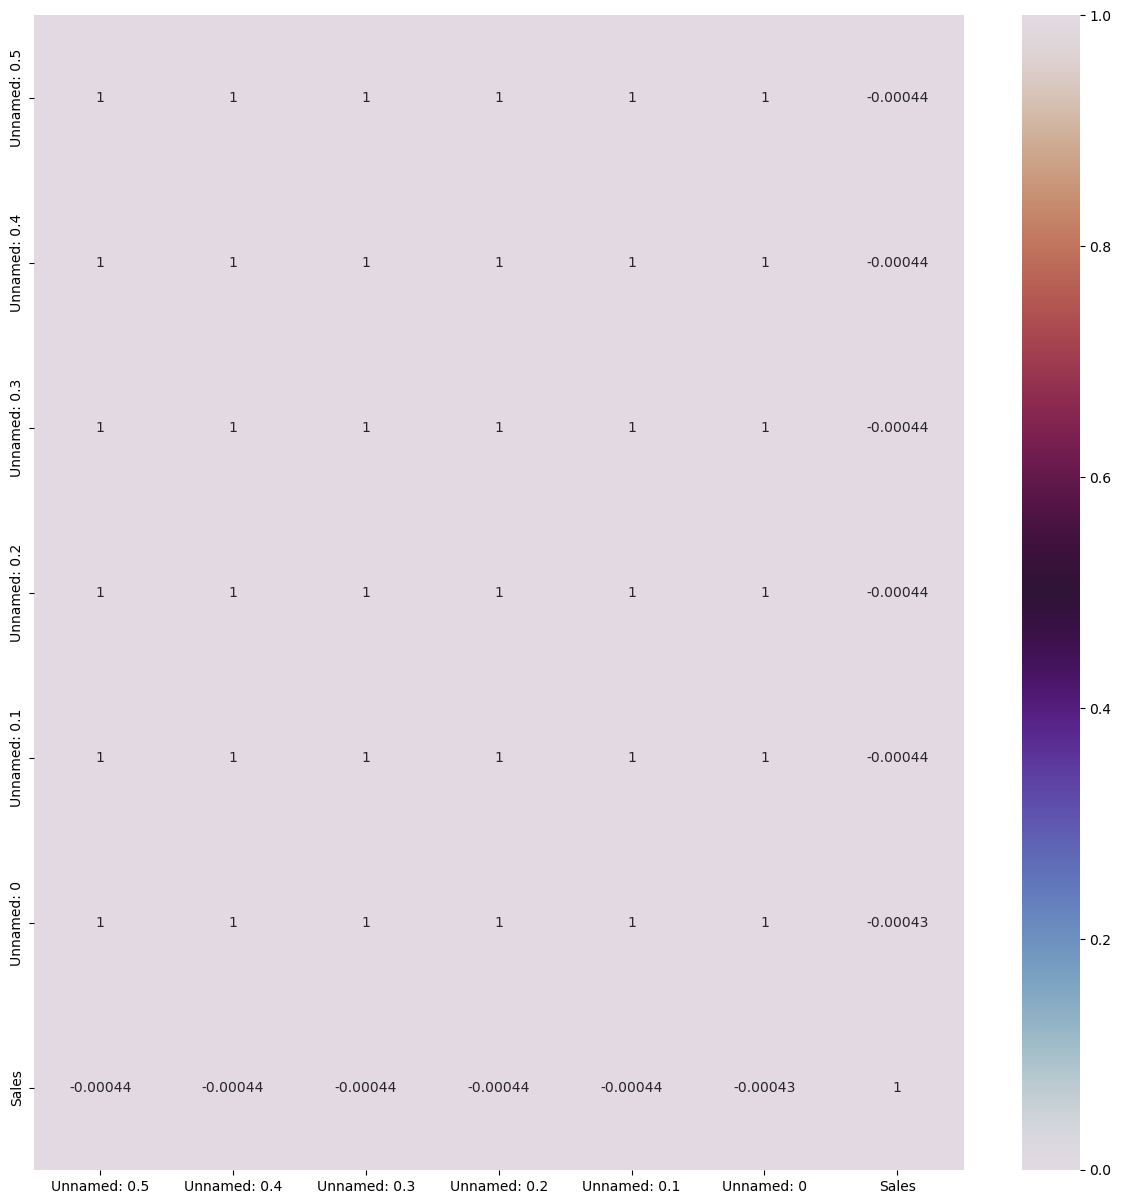

In [12]:
corrmat=sales_data.corr()
top_corr=corrmat.index
plt.figure(figsize=(15,15))
#plot the heatmap
g=sns.heatmap(sales_data[top_corr].corr(),annot=True,cmap='twilight')

In [13]:
sales_data.to_csv('C:/Users/SHIVANI SINGH/OneDrive/Documents/train.csv')

In [14]:
print(sales_data.shape)
sales_data.head()

(9789, 18)


Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0  Order Date    Customer Name    Segment        Country  \
0           0  08/11/2017      Claire Gute   Consumer  United States   
1           1  08/11/2017      Claire Gute   Consumer  United States   
2           2  12/06/2017  Darrin Van Huff  Corporate  United States   
3           3  11/10/2016   Sean O'Donnell   Consumer  United States   
4           4  11/10/2016   Sean O'Donnell   Consumer  United States   

              City       State Region       Product ID         Category  \
0        Henderson    Kentucky  South  FUR-BO-10001798        Furniture   
1        Henderson    Kentucky  South  FUR-CH-10000454        Furniture   
2      Los Angeles  California   West  OFF-LA-10000240  Office Supplies   
3  Fort Lauderdale     Florida  South  FUR-TA-10000577        Furniture   
4  Fort Lauderdale     Florida  South  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name     Sales  
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4      Storage                     Eldon Fold 'N Roll Cart System   22.3680

In [15]:
sales_data['Country'].unique()

array(['United States'], dtype=object)

In [16]:
states=sales_data['State'].unique()
np.count_nonzero(states)

48

In [17]:
cities=sales_data['City'].unique()
np.count_nonzero(cities)

529

In [18]:
top_cities= sales_data['City'].value_counts().nlargest(20)
top_cities

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Dallas           156
Jacksonville     125
Detroit          115
Newark            92
Jackson           82
Columbia          81
Richmond          81
Aurora            68
Phoenix           63
Arlington         60
Name: City, dtype: int64

In [19]:
top_customers= sales_data['Customer Name'].value_counts().nlargest(20)
top_customers

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Arthur Prichep         31
Zuschuss Carroll       31
Emily Phan             31
Lena Cacioppo          30
Dean percer            29
Ken Lonsdale           29
Brian Moss             29
Greg Tran              29
Keith Dawkins          28
Kunst Miller           28
Clay Ludtke            28
Chris Selesnick        28
Xylona Preis           28
Name: Customer Name, dtype: int64

In [20]:
rslt_df = sales_data[sales_data['Customer Name'] == 'William Brown']
rslt_df.head()

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
2133          2133          2133          2133          2133          2133   
2134          2134          2134          2134          2134          2134   
2135          2135          2135          2135          2135          2135   
2148          2148          2148          2148          2148          2148   
3740          3740          3740          3740          3740          3740   

      Unnamed: 0  Order Date  Customer Name   Segment        Country  \
2133        2133  30/11/2016  William Brown  Consumer  United States   
2134        2134  30/11/2016  William Brown  Consumer  United States   
2135        2135  30/11/2016  William Brown  Consumer  United States   
2148        2148  12/12/2015  William Brown  Consumer  United States   
3740        3741  15/01/2017  William Brown  Consumer  United States   

               City         State Region       Product ID         Category  \
2133   Philadelphia  Pennsylvania   East  OFF-BI-10003656  Office Supplies   
2134   Philadelphia  Pennsylvania   East  OFF-FA-10000053  Office Supplies   
2135   Philadelphia  Pennsylvania   East  TEC-PH-10002807       Technology   
2148        Concord    California   West  FUR-FU-10003975        Furniture   
3740  New York City      New York   East  OFF-EN-10001137  Office Supplies   

     Sub-Category                                       Product Name    Sales  
2133      Binders        Fellowes PB200 Plastic Comb Binding Machine  152.991  
2134    Fasteners                Revere Boxed Rubber Bands by Revere   10.584  
2135       Phones          Motorla HX550 Universal Bluetooth Headset   94.920  
2148  Furnishings  Eldon Advantage Chair Mats for Low to Medium P...   43.310  
3740    Envelopes           #10 Gummed Flap White Envelopes, 100/Box   16.520

In [21]:
category=sales_data['Category'].unique()
print(category)
print(np.count_nonzero(category))

['Furniture' 'Office Supplies' 'Technology']
3


Text(0, 0.5, 'Count')

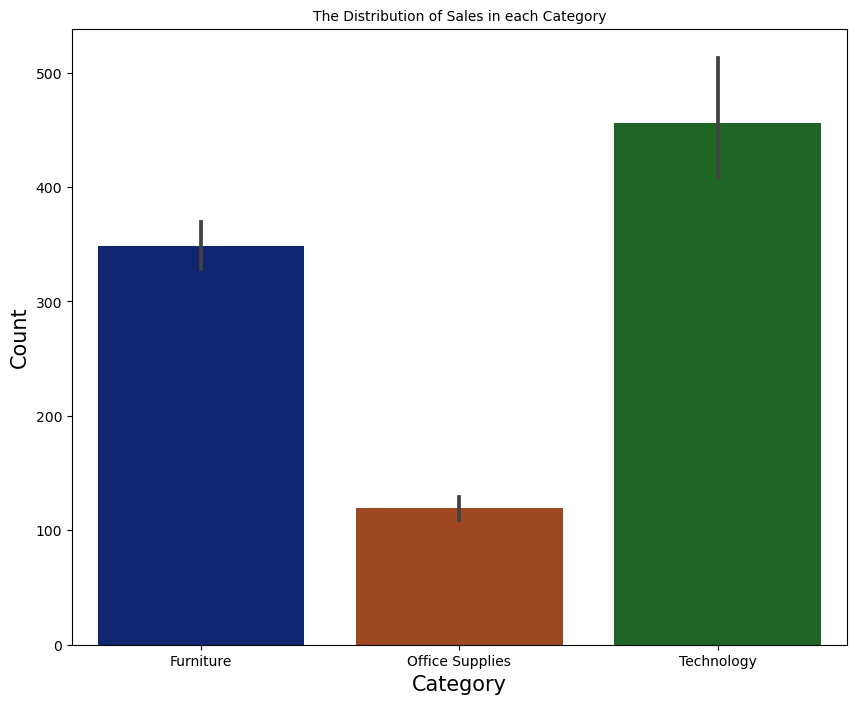

In [22]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.barplot(x = sales_data['Category'], y = sales_data['Sales'], palette ='dark')
plt.title('The Distribution of Sales in each Category', fontsize = 10)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [23]:
subcategory=sales_data['Sub-Category'].unique()
print(subcategory)
print(np.count_nonzero(subcategory))

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
17


Text(0, 0.5, 'Count')

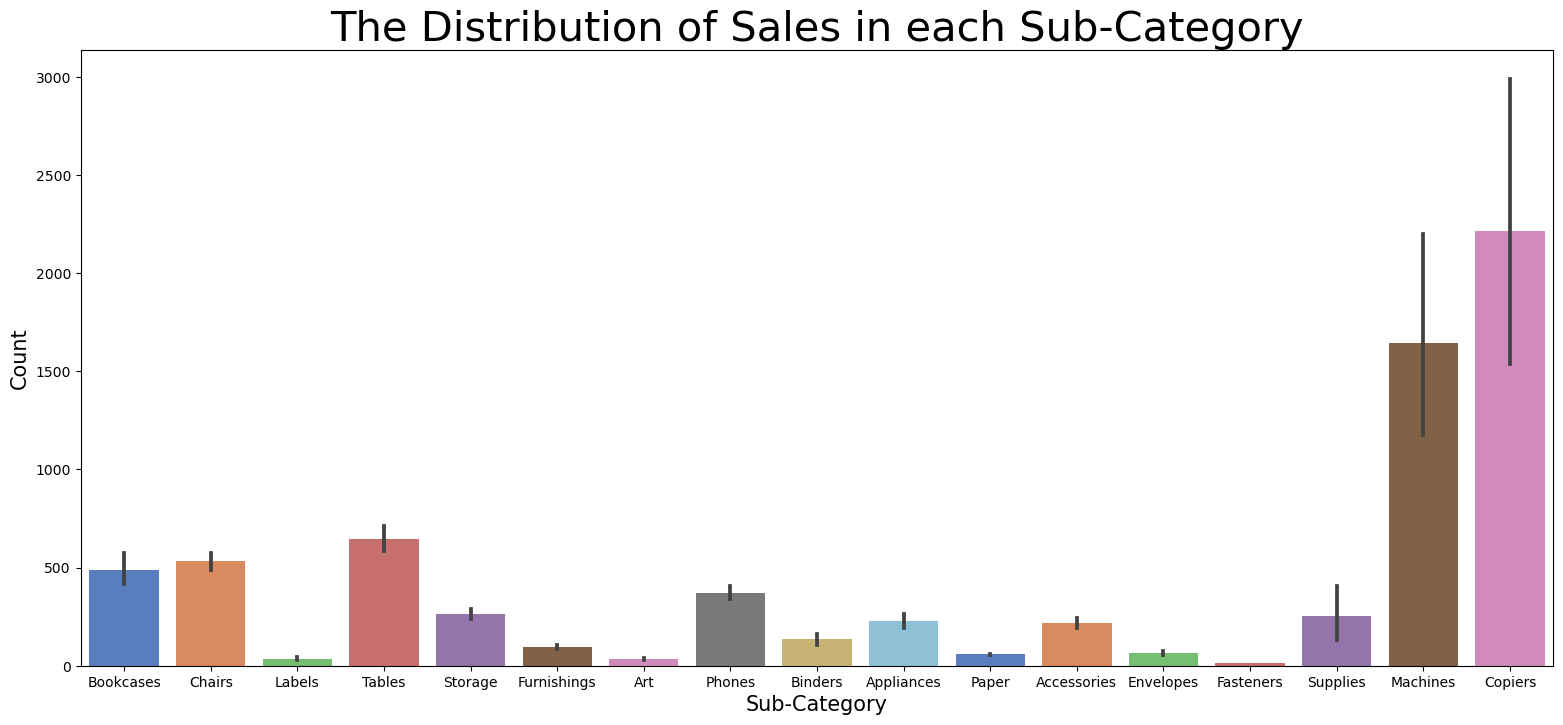

In [24]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = sales_data['Sub-Category'], y = sales_data['Sales'], palette ='muted')
plt.title('The Distribution of Sales in each Sub-Category', fontsize = 30)
plt.xlabel('Sub-Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [25]:
top_products= sales_data['Sub-Category'].value_counts().nlargest(5)
top_products

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Name: Sub-Category, dtype: int64

In [26]:
segment=sales_data['Segment'].unique()
print(segment)
print(np.count_nonzero(segment))

['Consumer' 'Corporate' 'Home Office']
3


Text(0, 0.5, 'Count')

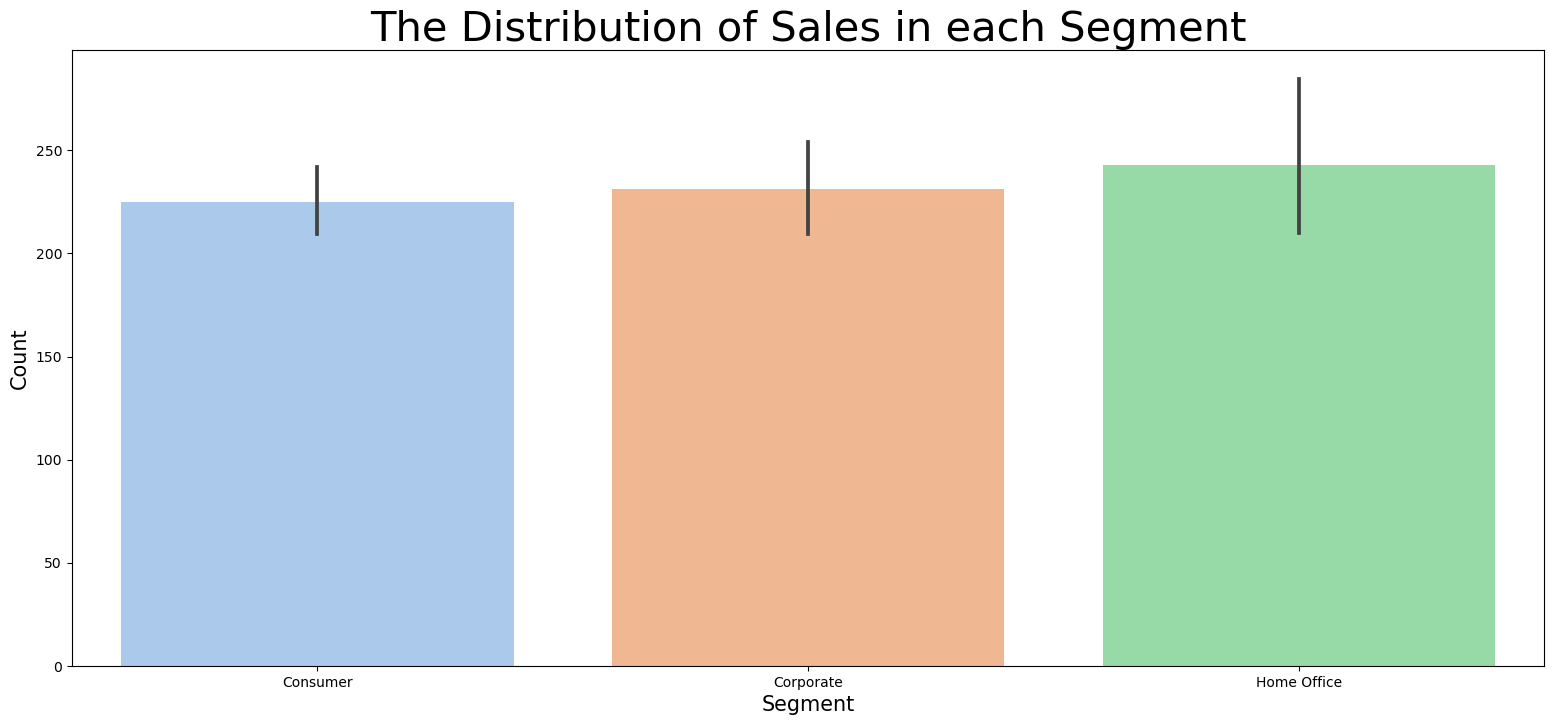

In [27]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = sales_data['Segment'], y = sales_data['Sales'], palette ='pastel')
plt.title('The Distribution of Sales in each Segment', fontsize = 30)
plt.xlabel('Segment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

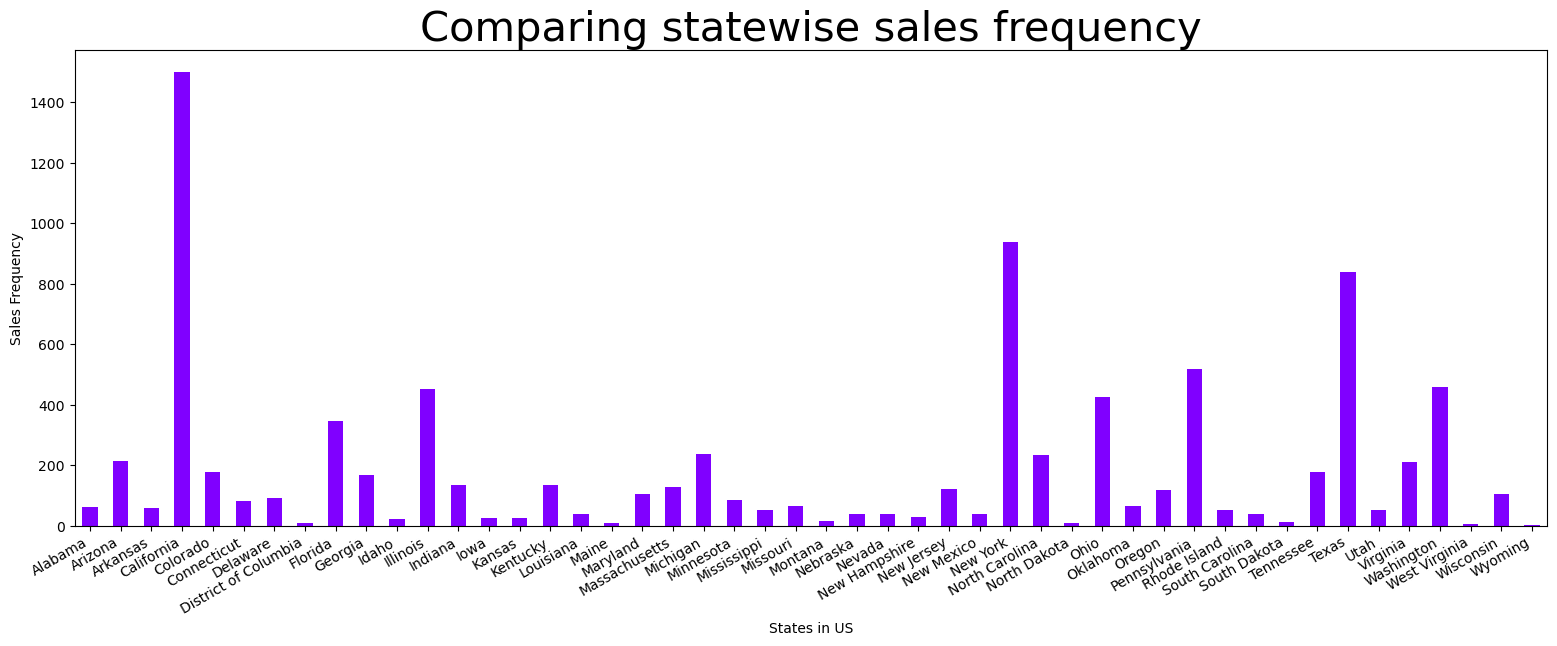

In [28]:
sales_data.groupby(['State'])['Sales'].nunique().plot.bar(figsize = (19, 7), cmap= 'rainbow')
plt.gcf().autofmt_xdate()
plt.title('Comparing statewise sales frequency', fontsize = 30)
plt.xlabel('States in US', fontsize = 10)
plt.ylabel('Sales Frequency')
plt.show()

In [29]:
top_states= sales_data['State'].value_counts().nlargest(10)
top_states

California        1946
New York          1097
Texas              973
Pennsylvania       582
Washington         504
Illinois           483
Ohio               454
Florida            373
Michigan           253
North Carolina     247
Name: State, dtype: int64

In [30]:
print(sales_data['State'].max())

Wyoming


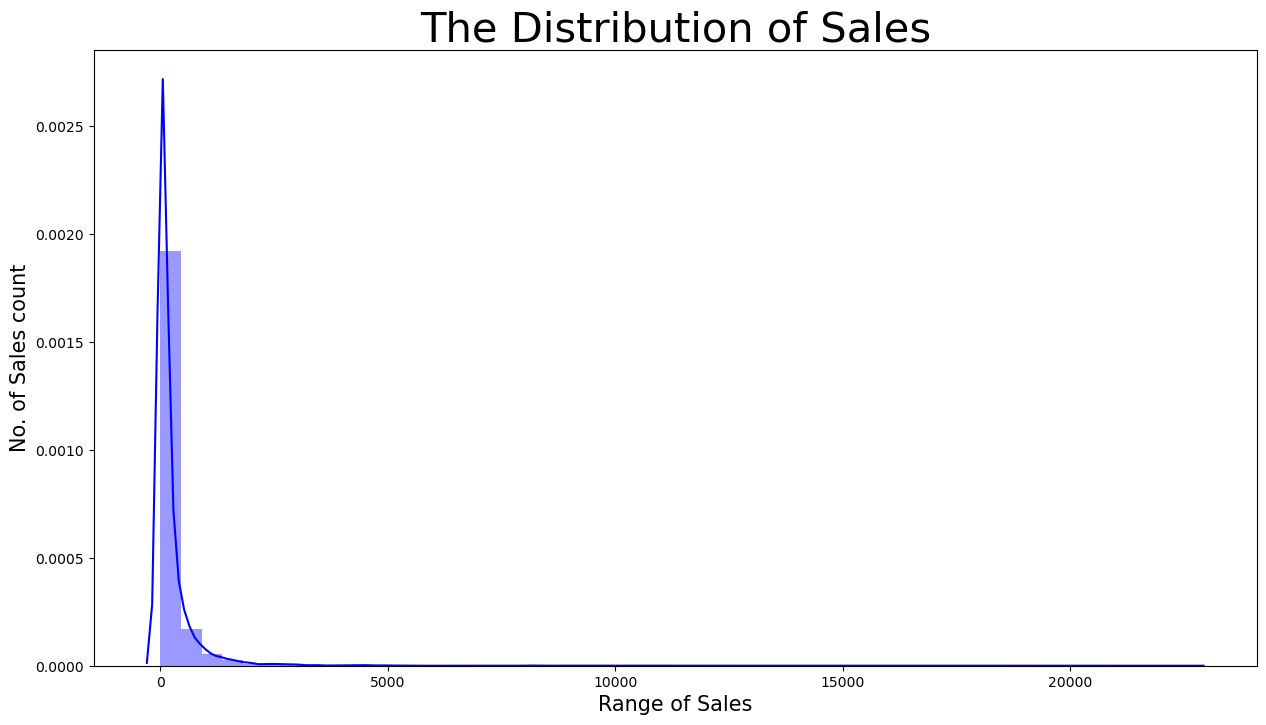

In [31]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(sales_data['Sales'], color = 'blue')
plt.title('The Distribution of Sales', fontsize = 30)
plt.xlabel('Range of Sales', fontsize = 15)
plt.ylabel('No. of Sales count', fontsize = 15)
plt.show()

In [32]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors = 'coerce')

In [33]:
sales_data['Year'] = sales_data['Order Date'].dt.year

In [34]:
sales_data['Month'] = sales_data['Order Date'].dt.month

In [35]:
sales_data['Date'] = sales_data['Order Date'].dt.day

In [36]:
sales_data.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Order Date', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Year', 'Month', 'Date'],
      dtype='object')

In [37]:
X=sales_data.copy()
X.drop(['Sales'],axis=1,inplace=True)
X.head()

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0 Order Date    Customer Name    Segment        Country  \
0           0 2017-08-11      Claire Gute   Consumer  United States   
1           1 2017-08-11      Claire Gute   Consumer  United States   
2           2 2017-12-06  Darrin Van Huff  Corporate  United States   
3           3 2016-11-10   Sean O'Donnell   Consumer  United States   
4           4 2016-11-10   Sean O'Donnell   Consumer  United States   

              City       State Region       Product ID         Category  \
0        Henderson    Kentucky  South  FUR-BO-10001798        Furniture   
1        Henderson    Kentucky  South  FUR-CH-10000454        Furniture   
2      Los Angeles  California   West  OFF-LA-10000240  Office Supplies   
3  Fort Lauderdale     Florida  South  FUR-TA-10000577        Furniture   
4  Fort Lauderdale     Florida  South  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name  Year  \
0    Bookcases                  Bush Somerset Collection Bookcase  2017   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  2017   
2       Labels  Self-Adhesive Address Labels for Typewriters b...  2017   
3       Tables      Bretford CR4500 Series Slim Rectangular Table  2016   
4      Storage                     Eldon Fold 'N Roll Cart System  2016   

   Month  Date  
0      8    11  
1      8    11  
2     12     6  
3     11    10  
4     11    10

In [38]:
y=sales_data.iloc[:,11]
y.head()

0      Kentucky
1      Kentucky
2    California
3       Florida
4       Florida
Name: State, dtype: object

Text(0, 0.5, 'Sales Price')

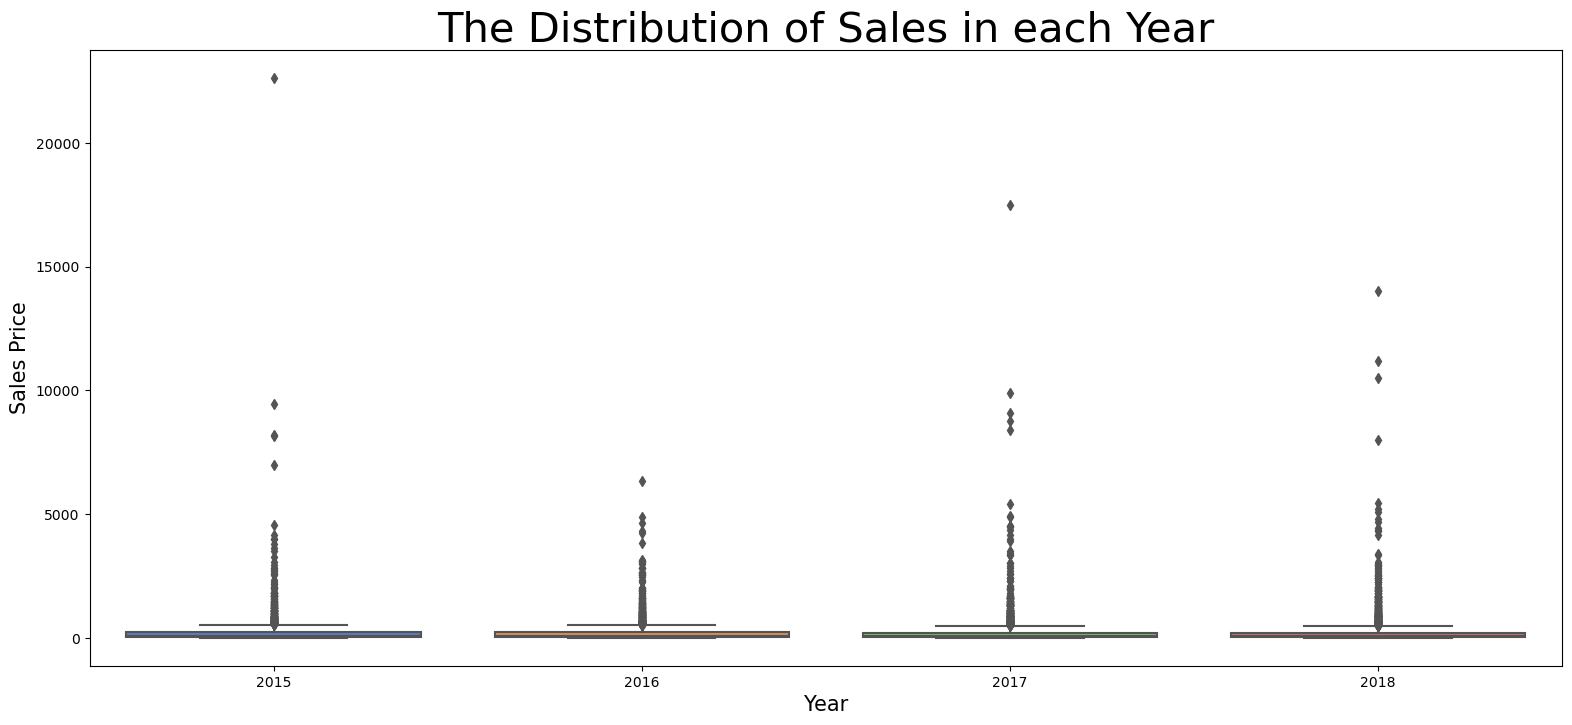

In [39]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = sales_data['Year'], y = sales_data['Sales'], palette ='muted')
plt.title('The Distribution of Sales in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales Price', fontsize = 15)

In [40]:
year_max=sales_data[sales_data['Sales'] == 22638.480000]
year_max

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
2696          2696          2696          2696          2696          2696   

      Unnamed: 0 Order Date Customer Name      Segment        Country  ...  \
2696        2697 2015-03-18   Sean Miller  Home Office  United States  ...   

        State Region       Product ID    Category Sub-Category  \
2696  Florida  South  TEC-MA-10002412  Technology     Machines   

                                           Product Name     Sales  Year  \
2696  Cisco TelePresence System EX90 Videoconferenci...  22638.48  2015   

      Month  Date  
2696      3    18  

[1 rows x 21 columns]

Text(0, 0.5, 'Sales')

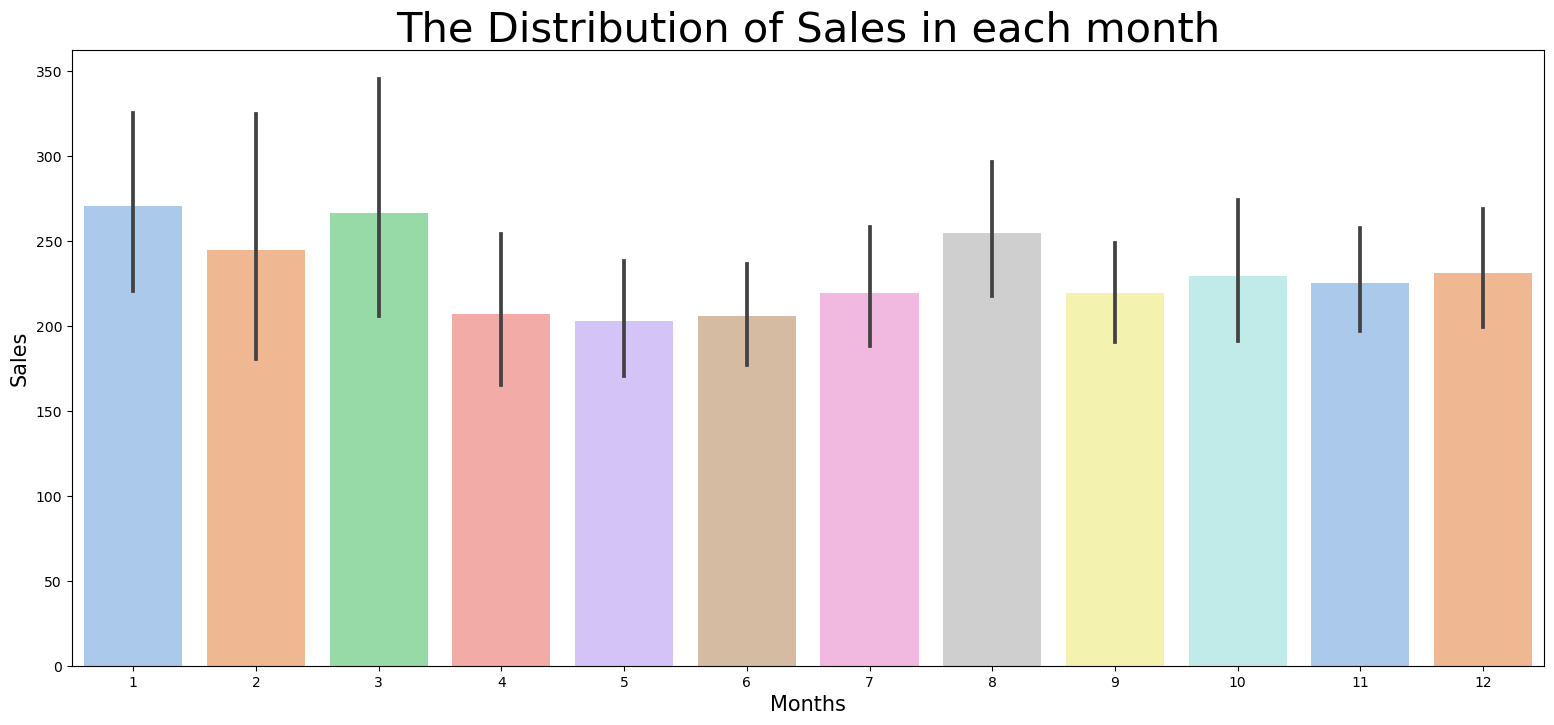

In [41]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = sales_data['Month'], y = sales_data['Sales'], palette ='pastel')
plt.title('The Distribution of Sales in each month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

Text(0, 0.5, 'Sales')

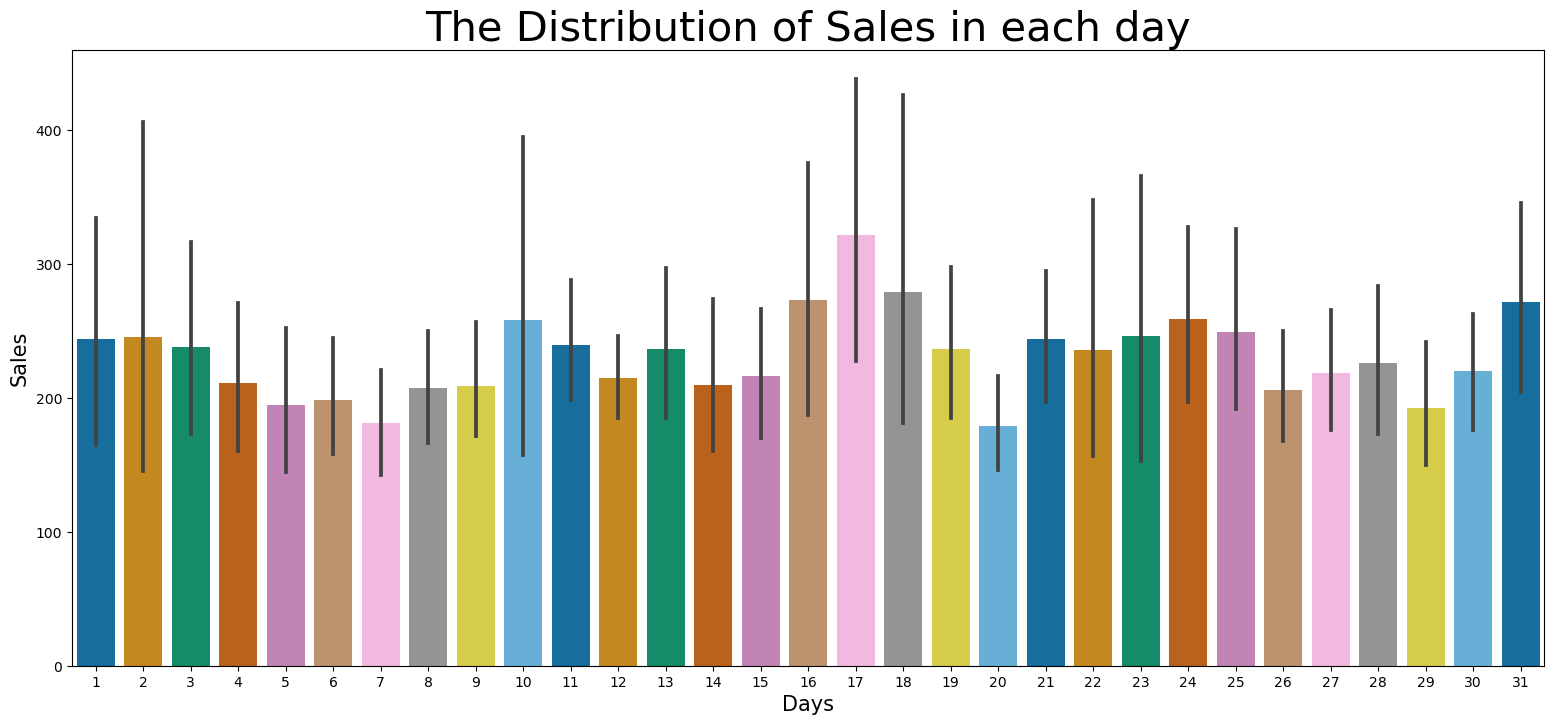

In [42]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = sales_data['Date'], y = sales_data['Sales'], palette ='colorblind')
plt.title('The Distribution of Sales in each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

In [43]:
features=['Order Date','Sales']
salesplot=sales_data[features]
salesplot.head()

Order Date     Sales
0 2017-08-11  261.9600
1 2017-08-11  731.9400
2 2017-12-06   14.6200
3 2016-11-10  957.5775
4 2016-11-10   22.3680

In [44]:
salesplot.sort_values(by='Order Date',inplace=True)
salesplot

Order Date    Sales
540  2015-01-02  468.900
7948 2015-01-03  129.552
7946 2015-01-03  362.250
7945 2015-01-03   18.840
8307 2015-01-03  137.352
...         ...      ...
645  2018-12-30  209.300
906  2018-12-30  323.136
1296 2018-12-30   13.904
1297 2018-12-30   20.720
907  2018-12-30   90.930

[9789 rows x 2 columns]

In [45]:
Order_date=salesplot['Order Date']
Sales=salesplot['Sales']

Text(0, 0.5, 'Sales')

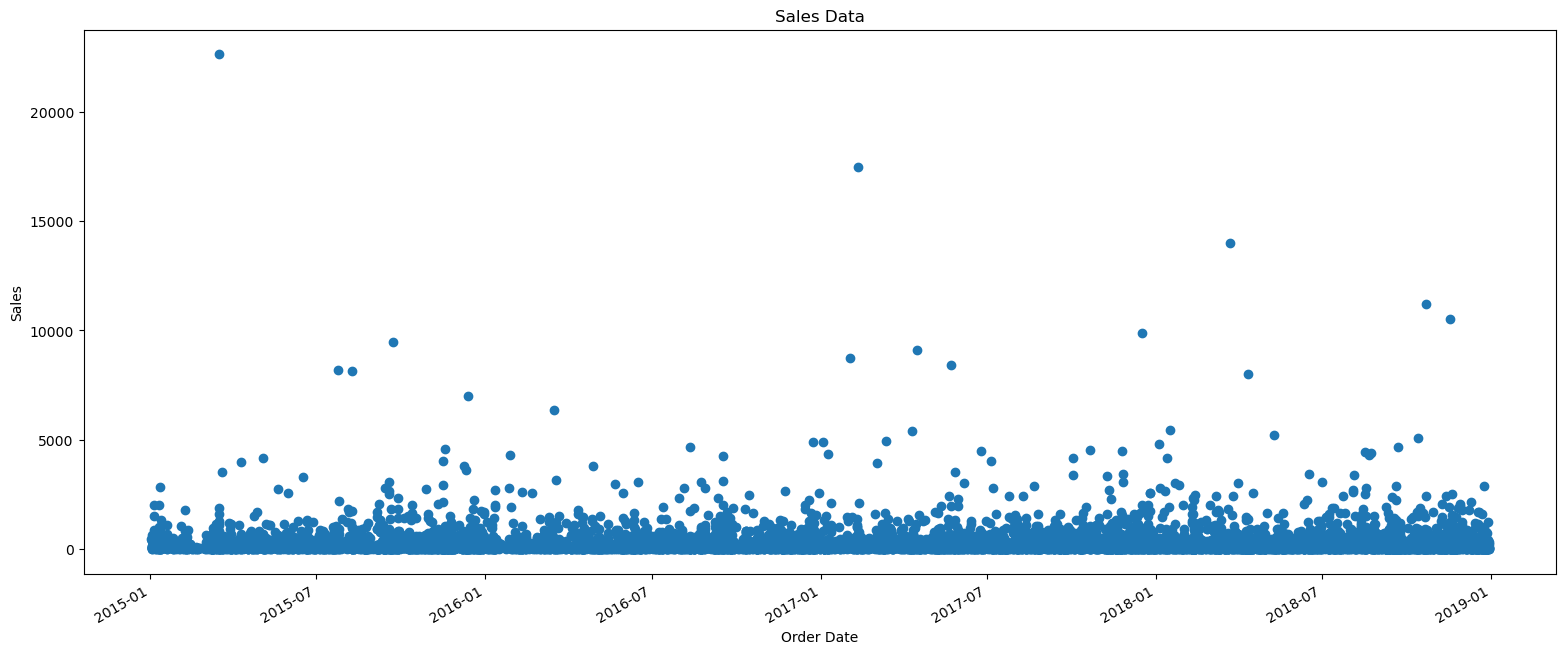

In [46]:
plt.plot_date(Order_date,Sales,xdate=True)
plt.gcf().autofmt_xdate()
plt.title('Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')

In [47]:
import plotly.express as px

fig = px.line(salesplot, x=Order_date, y=Sales, title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
df1=pd.read_csv('C:/Users/SHIVANI SINGH/OneDrive/Documents/train.csv')
df1.head()

Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.1  Unnamed: 0  Order Date    Customer Name    Segment  \
0             0           0  08/11/2017      Claire Gute   Consumer   
1             1           1  08/11/2017      Claire Gute   Consumer   
2             2           2  12/06/2017  Darrin Van Huff  Corporate   
3             3           3  11/10/2016   Sean O'Donnell   Consumer   
4             4           4  11/10/2016   Sean O'Donnell   Consumer   

         Country             City       State Region       Product ID  \
0  United States        Henderson    Kentucky  South  FUR-BO-10001798   
1  United States        Henderson    Kentucky  South  FUR-CH-10000454   
2  United States      Los Angeles  California   West  OFF-LA-10000240   
3  United States  Fort Lauderdale     Florida  South  FUR-TA-10000577   
4  United States  Fort Lauderdale     Florida  South  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [49]:
df1.shape

(9789, 19)

In [50]:
features=['Order Date','Sales']
dfs=df1[features]
dfs.head()

Order Date     Sales
0  08/11/2017  261.9600
1  08/11/2017  731.9400
2  12/06/2017   14.6200
3  11/10/2016  957.5775
4  11/10/2016   22.3680

In [51]:
dfs.shape

(9789, 2)

In [52]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9789 non-null   object 
 1   Sales       9789 non-null   float64
dtypes: float64(1), object(1)
memory usage: 153.1+ KB


In [53]:
dfs.tail()

Order Date    Sales
9784  21/05/2017    3.798
9785  12/01/2016   10.368
9786  12/01/2016  235.188
9787  12/01/2016   26.376
9788  12/01/2016   10.384

In [54]:
dfs['Order Date'] = pd.to_datetime(dfs['Order Date'], errors = 'coerce')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9789 non-null   datetime64[ns]
 1   Sales       9789 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 153.1 KB


In [55]:
dfs=dfs.groupby('Order Date')['Sales'].sum().reset_index()

In [56]:
dfs

Order Date      Sales
0    2015-01-02   468.9000
1    2015-01-03  2203.1510
2    2015-01-04   119.8880
3    2015-01-06  5188.5200
4    2015-01-07   601.0240
...         ...        ...
1224 2018-12-26   814.5940
1225 2018-12-27   177.6360
1226 2018-12-28  1657.3508
1227 2018-12-29  2915.5340
1228 2018-12-30   713.7900

[1229 rows x 2 columns]

In [57]:
dfs=dfs.set_index('Order Date')
dfs.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1229, freq=None)

In [58]:
y=dfs['Sales'].resample('MS').mean()

In [59]:
y['2015':]

Order Date
2015-01-01    1253.402348
2015-02-01     572.203818
2015-03-01    2077.988154
2015-04-01     988.400640
2015-05-01    1093.351481
2015-06-01    1122.359023
2015-07-01    1407.782320
2015-08-01    1556.219396
2015-09-01    2536.784608
2015-10-01    1382.477880
2015-11-01    2384.053944
2015-12-01    2444.935027
2016-01-01    1630.410356
2016-02-01    1090.965895
2016-03-01    1379.587104
2016-04-01    1585.707021
2016-05-01    1139.316981
2016-06-01    1239.822096
2016-07-01    1211.222174
2016-08-01    1942.262174
2016-09-01    2513.576808
2016-10-01    1171.551444
2016-11-01    1923.428654
2016-12-01    1958.958637
2017-01-01    1653.448818
2017-02-01    2223.072273
2017-03-01    1749.647893
2017-04-01    1629.540308
2017-05-01    2315.580421
2017-06-01    1389.612731
2017-07-01    1606.228577
2017-08-01    1634.529086
2017-09-01    1403.182976
2017-10-01    1931.739185
2017-11-01    2371.162393
2017-12-01    2698.040204
2018-01-01    2365.196440
2018-02-01    2127.340583
2

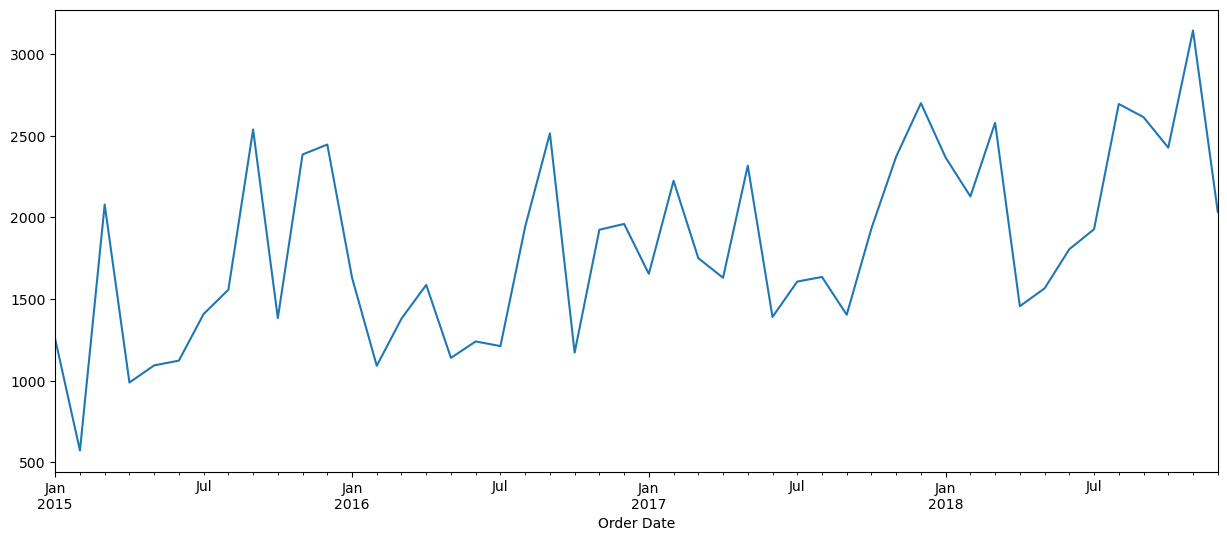

In [60]:
y.plot(figsize=(15,6))
plt.show()

In [61]:
rcParams['figure.figsize']=19,9

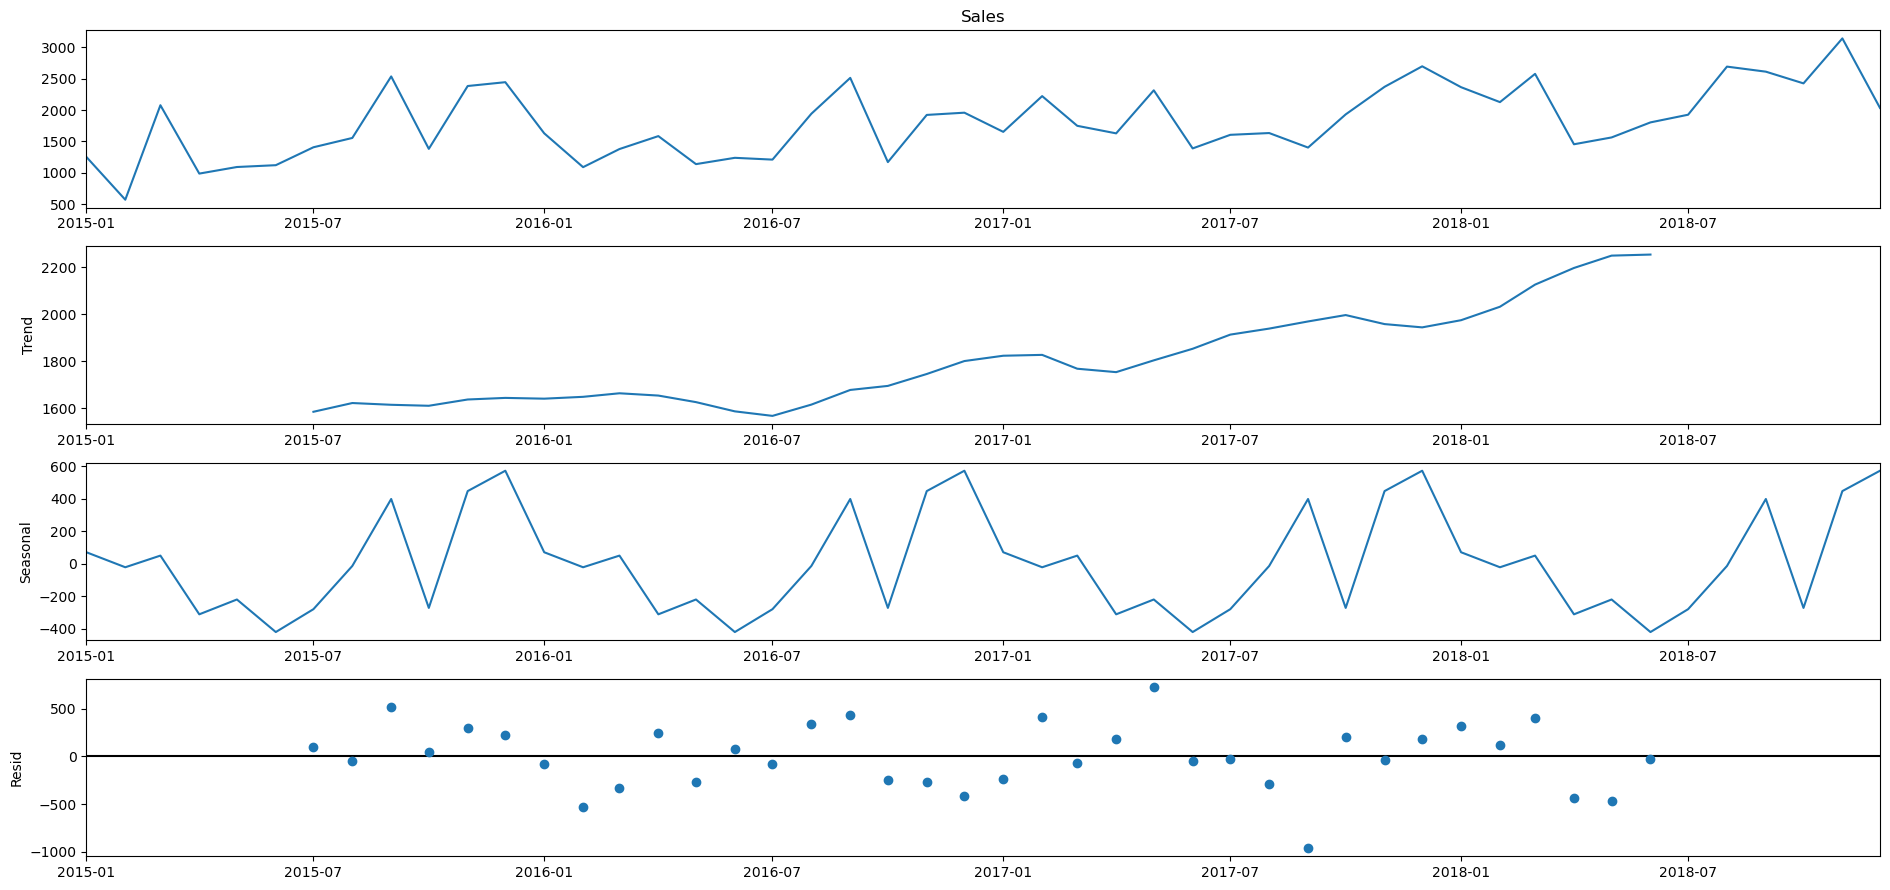

In [62]:
decomp=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomp.plot()
plt.show()

In [63]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seas_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [64]:
print('Some of the parameter combinations for Seasonal ARIMA:-')
print('SARIMAX: {} x {}'.format(pdq[1], seas_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seas_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seas_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seas_pdq[4]))

Some of the parameter combinations for Seasonal ARIMA:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [65]:
#parameter selection for our model
for param in pdq:
    for param_seasonal in seas_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:845.3792152645337
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1318.0981201168179
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:551.2124142928931
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:369.8497503721758


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:566.9415813305013
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:544.5575332116013
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:384.55737254450946
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:371.53608149498353
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:787.5473822766909


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2808.9924654713914
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:536.7383990876381
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:350.2833484052643
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:568.4564746410832
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:528.13227305352
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:384.0666733689335
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:352.0346268139387
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:725.2493199974161


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1518.0673674245795
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:551.8206183739068
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:353.890206712037
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:544.1033961277536


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1363.8868627670468
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:375.28912666230275
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:355.79689649803083
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:690.8549851622905
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1489.705442976025
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:519.1579816358201
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:327.3350676024725
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:537.6165430021297


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1659.1426240594515
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:364.470572046925
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:328.0271111928235
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.1735037228359
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1439.686307520737
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:551.6959191098443
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:367.8737194157106


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:545.3031419182641
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:543.236204557605
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:368.5632483136113
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:368.7870306797409
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:707.8100762639451
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2706.5787619247585


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:538.3950600446893
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:344.4632716664256
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:532.4900789499868
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:516.4216285877544


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:365.15090003950274
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:345.2508867425697
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:714.7496955525194
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1364.5810121629497
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:546.1664785552477


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:350.581774580161
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:524.1814110408603


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1012.6885333990806
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:353.7814919472837
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:352.21434697696435
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:691.8602466715735
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2367.401420561796
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:520.747836260201
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:329.22208005818516
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:521.2174016784764


C:\Users\SHIVANI SINGH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:450.50356581473835
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:348.63465674965204
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:330.02684170713303


In [66]:
mod=sm.tsa.statespace.SARIMAX(y,order=(0,1,1),seasonal_order=(0,1,1,12), enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1956.914     -0.001      1.000   -3836.480    3834.480
ma.S.L12      -1.0000   1956.936     -0.001      1.000   -3836.525    3834.524
sigma2      1.631e+05      0.011   1.44e+07      0.000    1.63e+05    1.63e+05


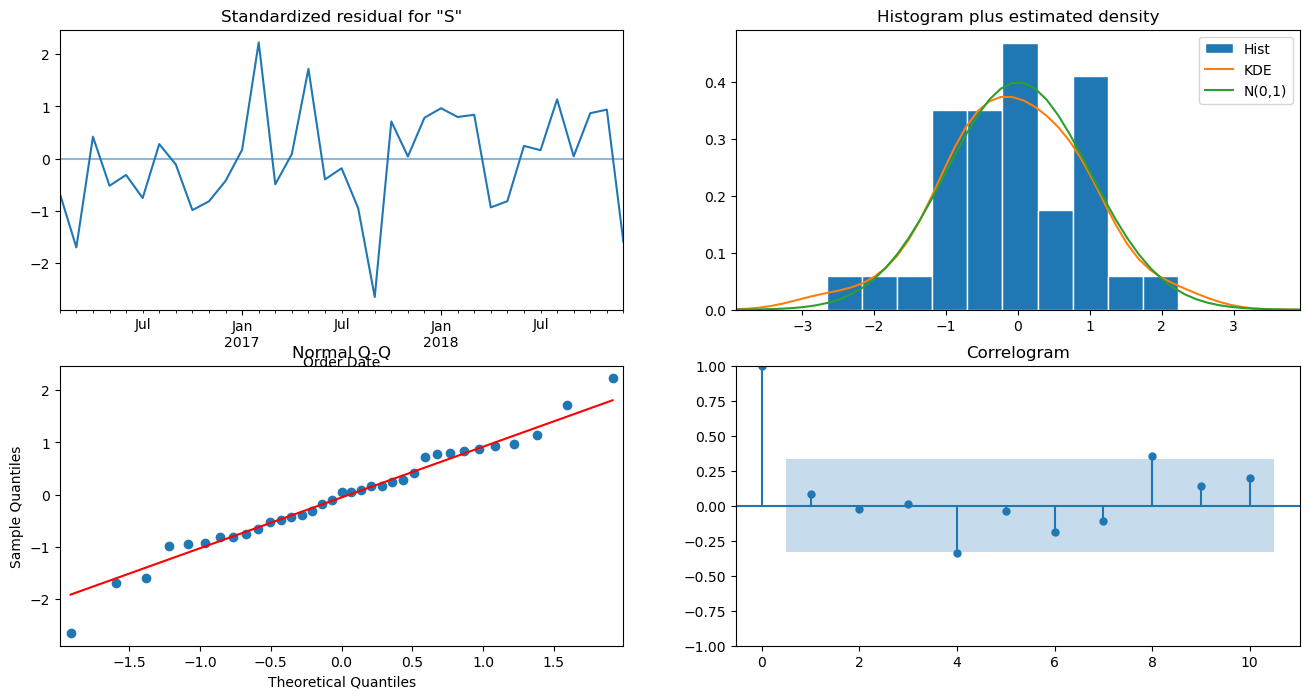

In [67]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

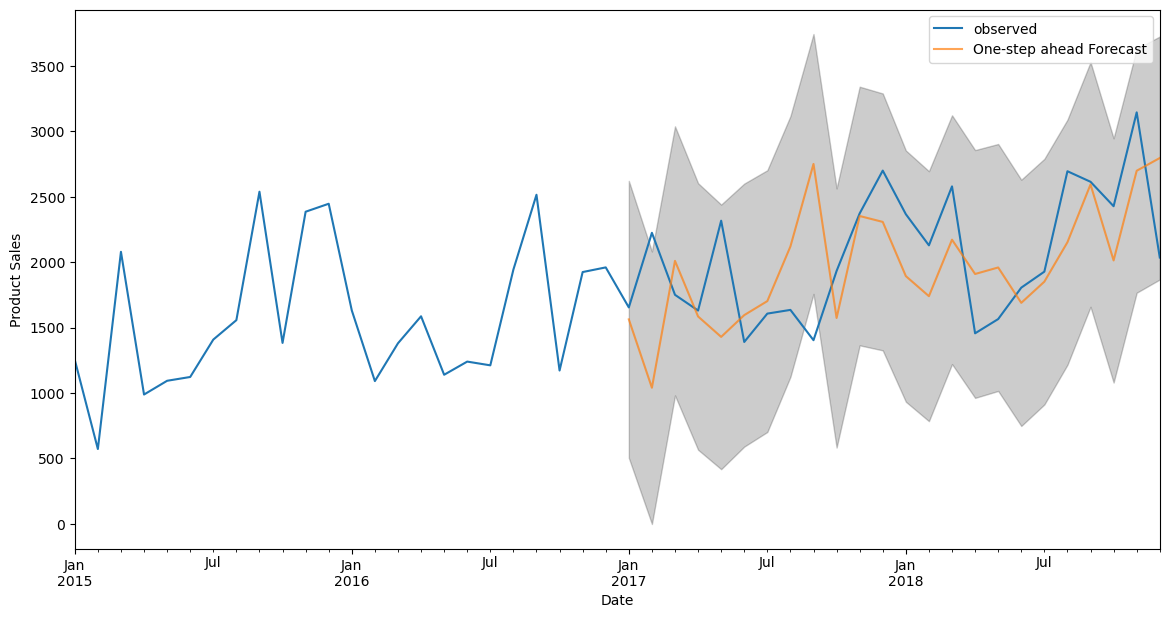

In [68]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [69]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

In [70]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 283499.56


In [71]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 532.45


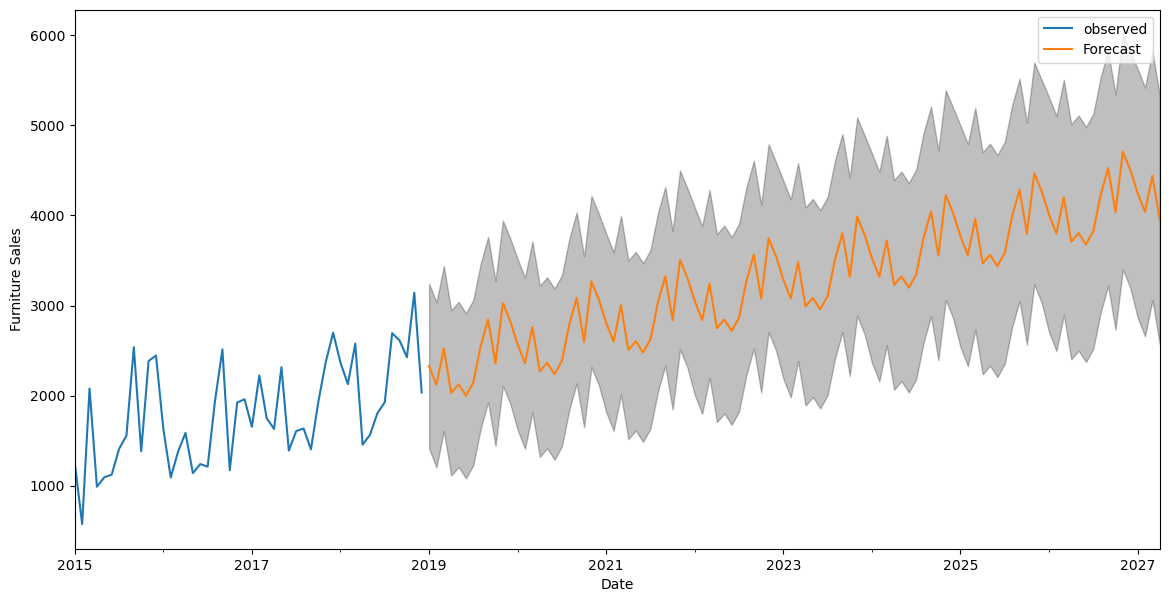

In [72]:
pred_uc1 = results.get_forecast(steps=100)
pred_ci1 = pred_uc1.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

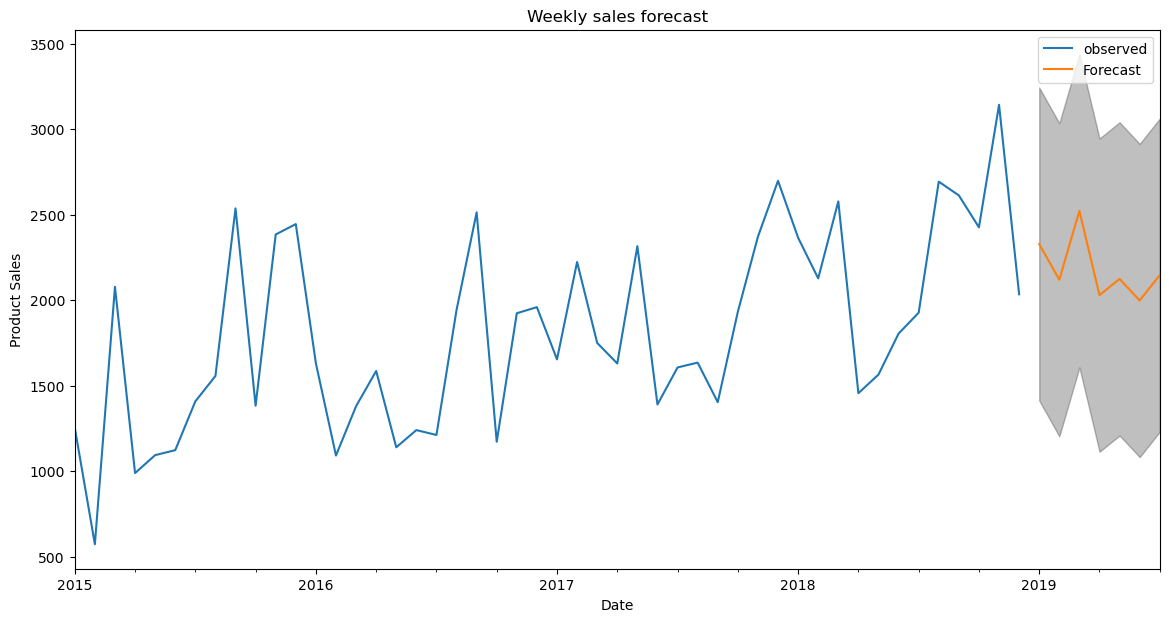

In [73]:
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.title('Weekly sales forecast', fontsize=12)
plt.legend()
plt.show()

In [74]:
df_customer_type = sales_data.groupby('Segment')['Sales'].mean()
print(df_customer_type)

Segment
Consumer       225.021223
Corporate      231.415141
Home Office    242.800818
Name: Sales, dtype: float64


<Axes: title={'center': 'Average Total Amount Spent By Customer type '}, xlabel='Segment'>

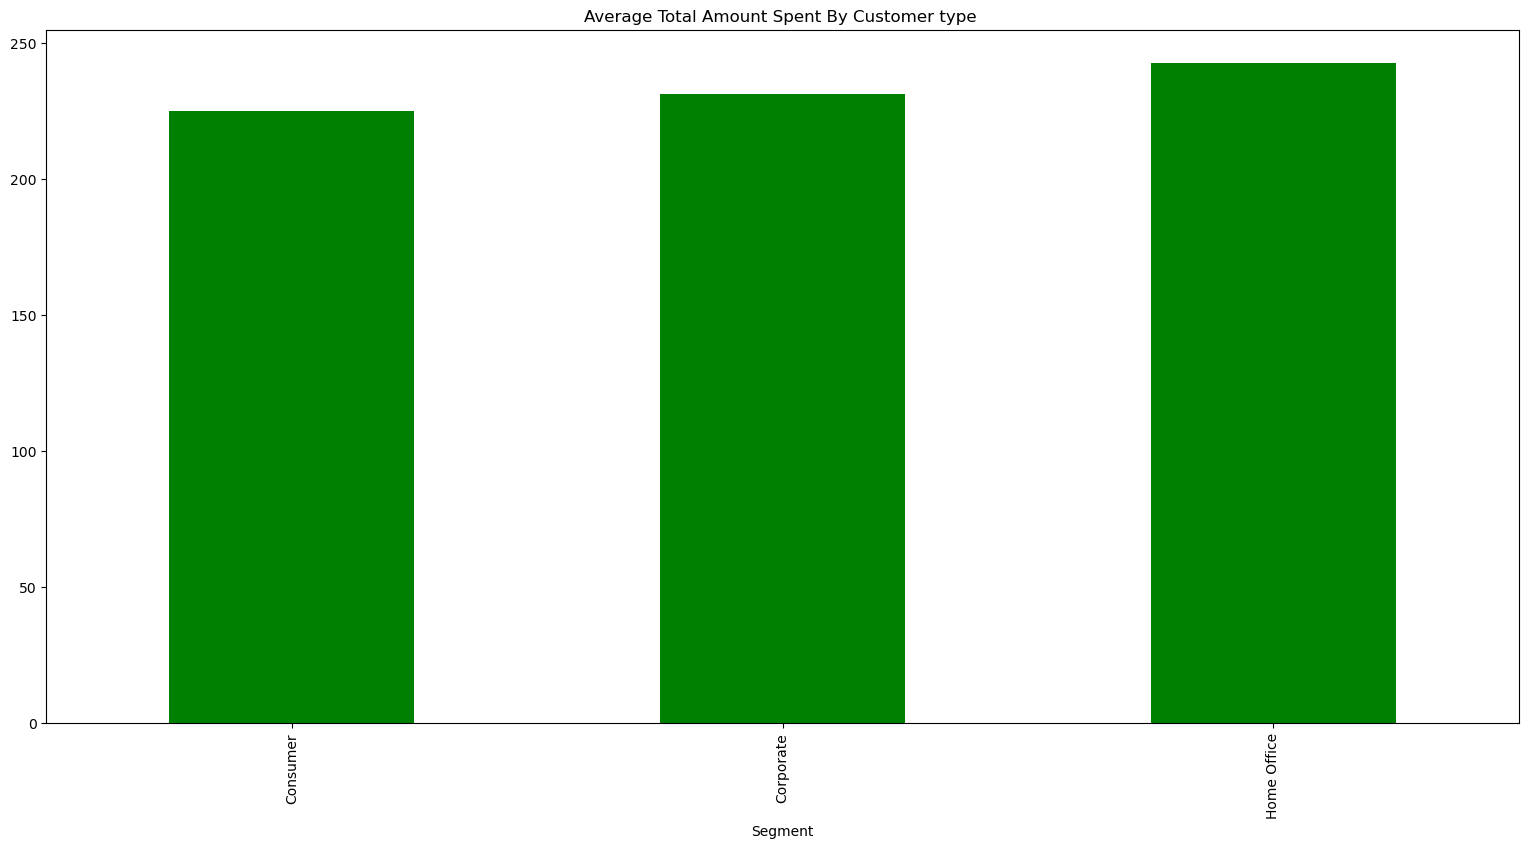

In [75]:
df_customer_type.plot(kind='bar', title = 'Average Total Amount Spent By Customer type ', color='green')

In [76]:
predicted_sale= pred_ci1[:7]

In [77]:
predicted_sale

lower Sales  upper Sales
2019-01-01  1412.270560  3243.606838
2019-02-01  1203.230109  3035.604091
2019-03-01  1606.005668  3438.543385
2019-04-01  1113.074853  2945.637030
2019-05-01  1207.857641  3040.423449
2019-06-01  1081.584497  2914.150881
2019-07-01  1229.888057  3062.454786